In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go

In [2]:
covid = pd.read_csv('CSVs/covid_19_data_US_Statewise_datetime.csv')

In [3]:
covid['Country/Region']=covid['Country/Region'].replace('Hong Kong', 'China').replace('Taiwan', 'China').replace('Mainland China', 'China')

In [4]:
covid['ObservationDate'] = pd.to_datetime(covid['ObservationDate'])


# Part A) EDA

## 1. Analyze countries like China, South Korea, USA, Italy and Spain individually to see increasing number of cases on day-to-day basis. Provide insight and feedback using a deck as if you were providing findings to Senior management

In [5]:
countries = ['China','Italy','South Korea', 'Spain', 'US']

five_countries = covid[covid['Country/Region'].isin(countries)]


In [6]:
grouped = five_countries.groupby(['Country/Region','ObservationDate'], as_index = False).sum()

In [7]:
grouped.drop(columns=['SNo'], inplace=True)
grouped = grouped.sort_values('Country/Region')

In [8]:
grouped['Country/Region']

0      China
36     China
37     China
38     China
39     China
       ...  
268       US
267       US
266       US
272       US
315       US
Name: Country/Region, Length: 316, dtype: object

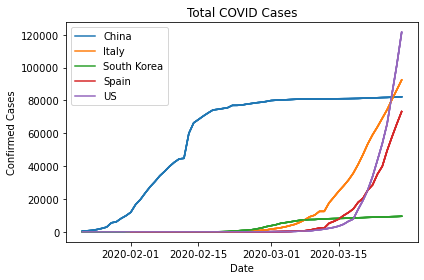

In [9]:
for country in countries:
    sns.lineplot(data = grouped, x = 'ObservationDate', y = 'Confirmed', hue ='Country/Region')
    plt.title('Total COVID Cases')
    plt.ylabel('Confirmed Cases')
    plt.xlabel('Date')
    plt.legend(countries)
plt.tight_layout()

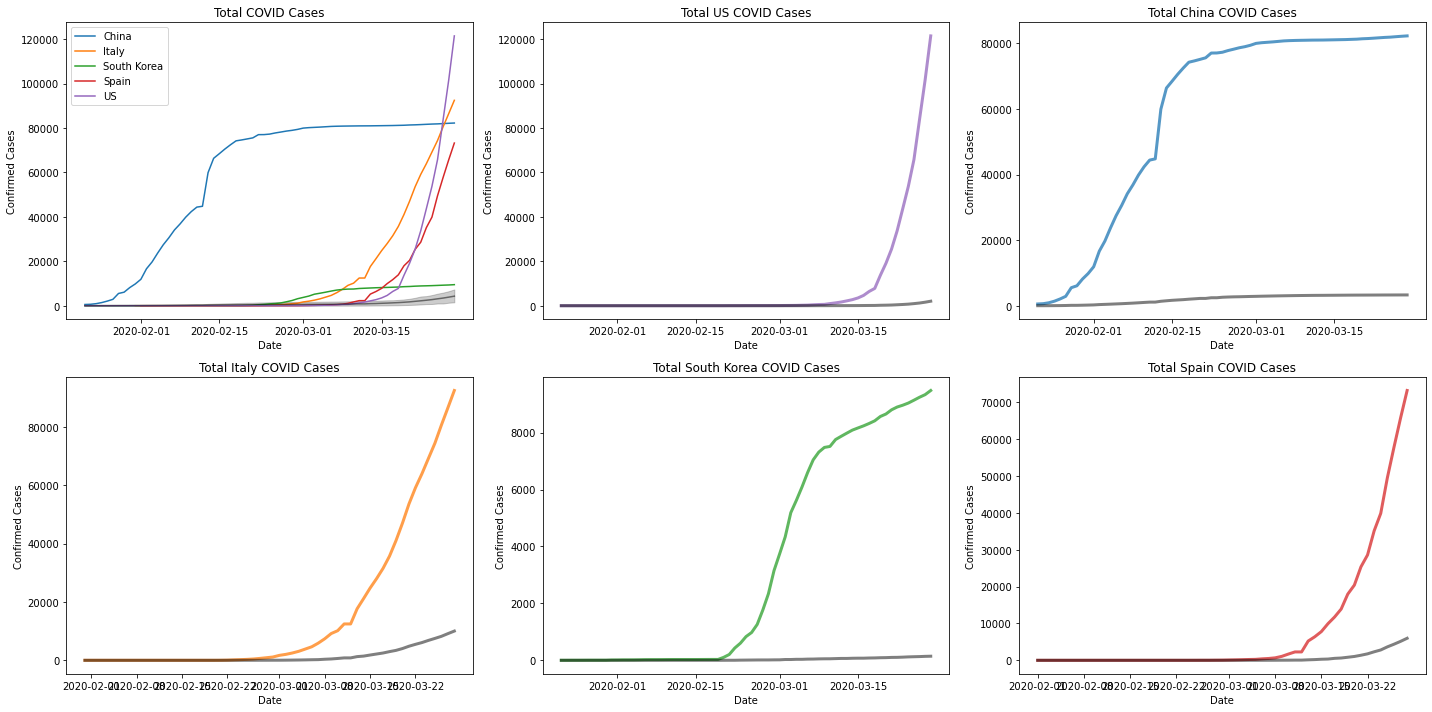

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.lineplot(data = grouped, x = 'ObservationDate', y = 'Confirmed', hue ='Country/Region')
sns.lineplot(data = grouped, x = 'ObservationDate', y = 'Deaths', color ='black', alpha =0.5)
plt.title('Total COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.legend(countries)
plt.tight_layout()
    
plt.subplot(2,3,2)
sns.lineplot(data=grouped[grouped['Country/Region'] =='US'], x = 'ObservationDate', y ='Confirmed', color = '#AE8CCD', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='US'], x = 'ObservationDate', y ='Deaths', color = 'black', linewidth =3, alpha =0.5)
plt.title('Total US COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='China'], x = 'ObservationDate', y ='Confirmed', color ='#5698C6', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='China'], x = 'ObservationDate', y ='Deaths', color = 'black', linewidth =3, alpha =0.5)
plt.title('Total China COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,4)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Italy'], x = 'ObservationDate', y ='Confirmed',color = '#FF9E4A', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Italy'], x = 'ObservationDate', y ='Deaths', color = 'black', linewidth =3, alpha =0.5)
plt.title('Total Italy COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,5)
sns.lineplot(data=grouped[grouped['Country/Region'] =='South Korea'], x = 'ObservationDate', y ='Confirmed', color='#60B760', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='South Korea'], x = 'ObservationDate', y ='Deaths', color = 'black', linewidth =3, alpha =0.5)
plt.title('Total South Korea COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,6)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Spain'], x = 'ObservationDate', y ='Confirmed', color='#E05C5D', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Spain'], x = 'ObservationDate', y ='Deaths', color = 'black', linewidth =3, alpha =0.5)
plt.title('Total Spain COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

In [11]:
grouped['daily_change'] = 0
for country in countries:
    for i in (grouped[grouped['Country/Region'] == country].index):
        if i - 1 == -1:
            grouped['daily_change'][i] = 0
        else:
            grouped['daily_change'][i] = grouped['Confirmed'][i] - grouped['Confirmed'][i-1]
            
grouped['daily_deaths'] = 0
for country in countries:
    for i in (grouped[grouped['Country/Region'] == country].index):
        if i - 1 == -1:
            grouped['daily_deaths'][i] = 0
        else:
            grouped['daily_deaths'][i] = grouped['Deaths'][i] - grouped['Deaths'][i-1]        

C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:

In [12]:
for i in range(grouped.shape[0]):
    if grouped['daily_change'][i] < 0:
        grouped['daily_change'][i] = 0

for i in range(grouped.shape[0]):
    if grouped['daily_deaths'][i] < 0:
        grouped['daily_deaths'][i] = 0        

C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


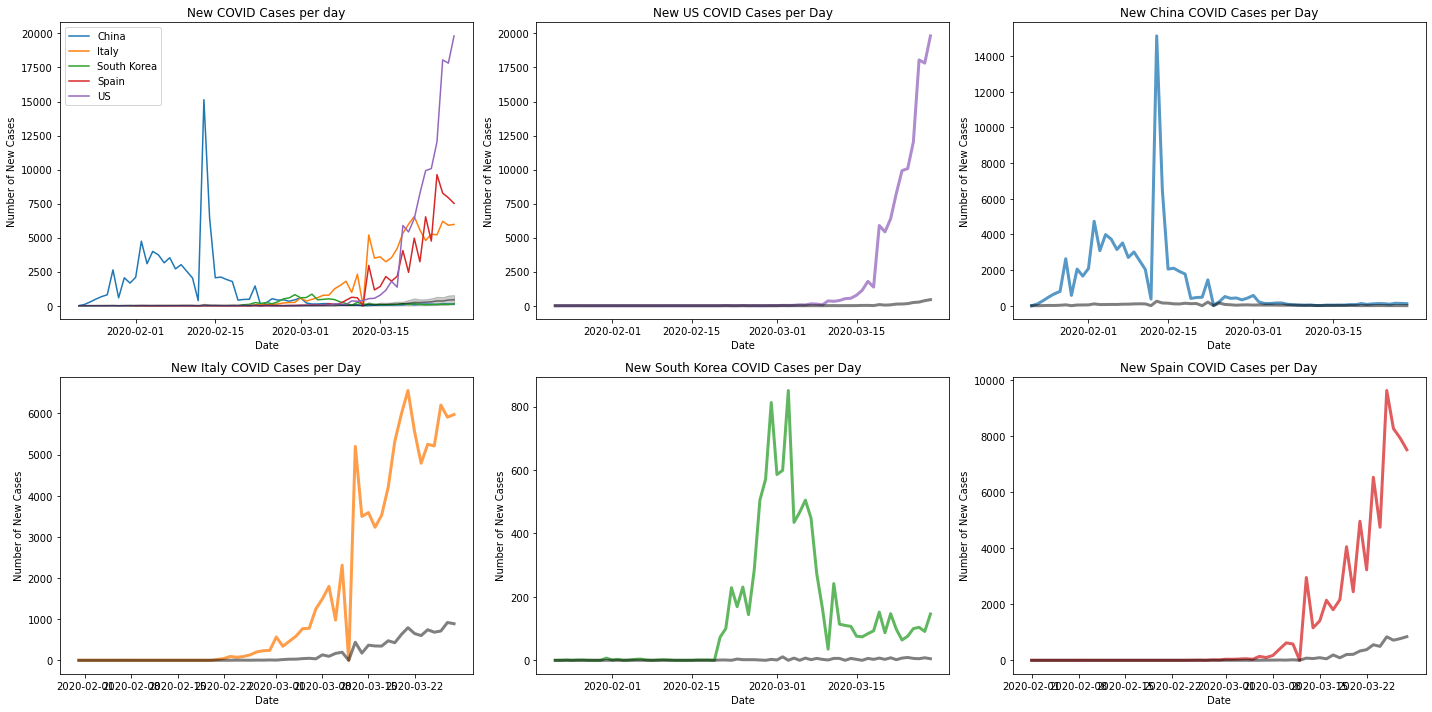

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.lineplot(data = grouped, x = 'ObservationDate', y = 'daily_change', hue ='Country/Region')
sns.lineplot(data = grouped, x = 'ObservationDate', y = 'daily_deaths', color ='black', alpha =0.5)
plt.title('New COVID Cases per day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.legend(countries)
plt.tight_layout()
    
plt.subplot(2,3,2)
sns.lineplot(data=grouped[grouped['Country/Region'] =='US'], x = 'ObservationDate', y ='daily_change', color = '#AE8CCD', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='US'], x = 'ObservationDate', y ='daily_deaths', color = 'black', linewidth =3, alpha = 0.5)
plt.title('New US COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='China'], x = 'ObservationDate', y ='daily_change', color ='#5698C6', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='China'], x = 'ObservationDate', y ='daily_deaths', color = 'black', linewidth =3, alpha = 0.5)
plt.title('New China COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,4)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Italy'], x = 'ObservationDate', y ='daily_change',color = '#FF9E4A', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Italy'], x = 'ObservationDate', y ='daily_deaths', color = 'black', linewidth =3, alpha = 0.5)
plt.title('New Italy COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,5)
sns.lineplot(data=grouped[grouped['Country/Region'] =='South Korea'], x = 'ObservationDate', y ='daily_change', color='#60B760', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='South Korea'], x = 'ObservationDate', y ='daily_deaths', color = 'black', linewidth =3, alpha = 0.5)
plt.title('New South Korea COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,6)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Spain'], x = 'ObservationDate', y ='daily_change', color='#E05C5D', linewidth =3)
sns.lineplot(data=grouped[grouped['Country/Region'] =='Spain'], x = 'ObservationDate', y ='daily_deaths', color = 'black', linewidth =3, alpha = 0.5)
plt.title('New Spain COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

## 2. Analyze countries together with respect to timelines incorporate measures taken and check for insights. Use web to extract as much information as possible and include conclusions.

China had the highest number of cases until late March, 2020. The cases in China gradually increased from the beginning of 2020, until they started to plateau in mid-February. Other countries did not start reporting cases until the beginning of March. 

China had large daily increases until mid-February. The US had the highest daily increase in cases from late March onward. China either had no new cases starting in early March, or the country simply stopped reporting new cases.

## 3. Analyze US States Michigan, New York, Illinois, Ohio and Indiana (Northeastern States only) to identify a trend of deaths and confirmed cases. 

In [14]:
states = [ 'Illinois','Indiana', 'Michigan','New York','Ohio']

In [15]:
covid_us = covid[covid['Country/Region'] == 'US']
us_ne = covid_us[covid_us['Province/State'].isin(states)]
us_ne.drop(columns=['SNo'], inplace =True)

C:\Users\rhais\anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
northeast = us_ne.groupby(['Province/State', 'ObservationDate'], as_index=False).sum()

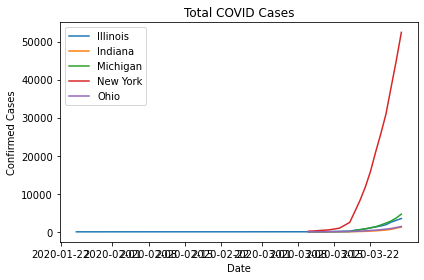

In [17]:
sns.lineplot(data = northeast, x = 'ObservationDate', y = 'Confirmed', hue ='Province/State')
plt.title('Total COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.legend(states)
plt.tight_layout()

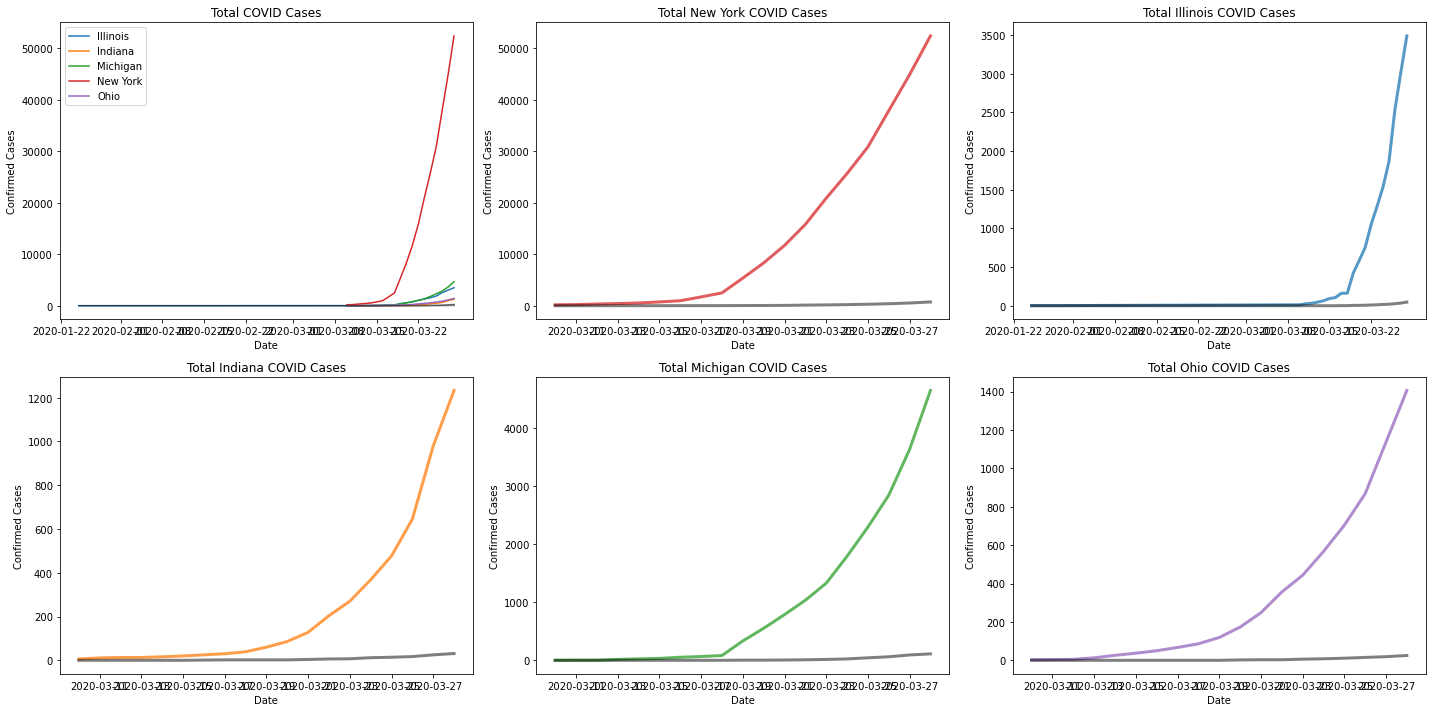

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
sns.lineplot(data = northeast, x = 'ObservationDate', y = 'Confirmed', hue ='Province/State')
sns.lineplot(data = northeast, x = 'ObservationDate', y = 'Deaths', color ='black', alpha =0.5)
plt.title('Total COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.legend(states)
plt.tight_layout()
    
plt.subplot(2,3,2)
sns.lineplot(data=northeast[northeast['Province/State'] =='New York'], x = 'ObservationDate', y ='Confirmed', color='#E05C5D', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='New York'], x = 'ObservationDate', y ='Deaths', color='black', linewidth =3, alpha = 0.5)
plt.title('Total New York COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Illinois'], x = 'ObservationDate', y ='Confirmed', color='#5698C6', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Illinois'], x = 'ObservationDate', y ='Deaths', color='black', linewidth =3, alpha = 0.5)
plt.title('Total Illinois COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,4)
sns.lineplot(data=northeast[northeast['Province/State'] =='Indiana'], x = 'ObservationDate', y ='Confirmed', color='#FF9E4A', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Indiana'], x = 'ObservationDate', y ='Deaths', color='black', linewidth =3, alpha = 0.5)
plt.title('Total Indiana COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,5)
sns.lineplot(data=northeast[northeast['Province/State'] =='Michigan'], x = 'ObservationDate', y ='Confirmed', color='#60B760', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Michigan'], x = 'ObservationDate', y ='Deaths', color='black', linewidth =3, alpha = 0.5)
plt.title('Total Michigan COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,6)
sns.lineplot(data=northeast[northeast['Province/State'] =='Ohio'], x = 'ObservationDate', y ='Confirmed', color='#AE8CCD', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Ohio'], x = 'ObservationDate', y ='Deaths', color='black', linewidth =3, alpha = 0.5)
plt.title('Total Ohio COVID Cases')
plt.ylabel('Confirmed Cases')
plt.xlabel('Date')
plt.tight_layout()

In [19]:
# Daily change/first derivative of above plots
northeast['daily_change'] = 0
for state in states:
    for i in (northeast[northeast['Province/State'] == state].index):
        if i - 1 == -1:
            northeast['daily_change'][i] = 0
        else:
            northeast['daily_change'][i] = northeast['Confirmed'][i] - northeast['Confirmed'][i-1]
            
northeast['daily_deaths'] = 0
for state in states:
    for i in (northeast[northeast['Province/State'] == state].index):
        if i - 1 == -1:
            northeast['daily_deaths'][i] = 0
        else:
            northeast['daily_deaths'][i] = northeast['Deaths'][i] - northeast['Deaths'][i-1]    

C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 

In [20]:
for i in range(northeast.shape[0]):
    if northeast['daily_change'][i] < 0:
        northeast['daily_change'][i] = 0
        
for i in range(northeast.shape[0]):
    if northeast['daily_deaths'][i] < 0:
        northeast['daily_deaths'][i] = 0
        

C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rhais\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


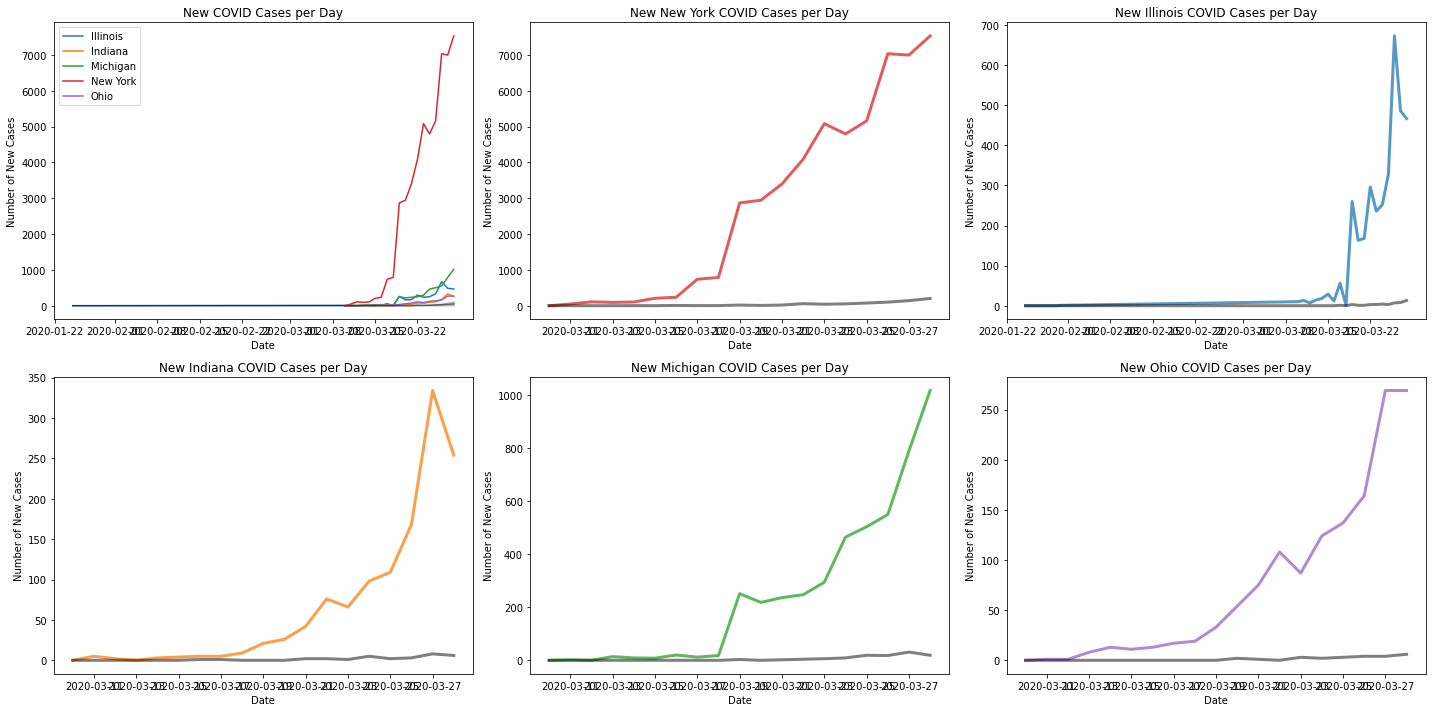

In [21]:
plt.figure(figsize=(20,10))


plt.subplot(2, 3, 1)
sns.lineplot(data = northeast, x = 'ObservationDate', y = 'daily_change', hue ='Province/State')
sns.lineplot(data = northeast, x = 'ObservationDate', y = 'daily_deaths',color = 'black', alpha =0.5)
plt.title('New COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.legend(states)
plt.tight_layout()
    
plt.subplot(2,3,2)
sns.lineplot(data=northeast[northeast['Province/State'] =='New York'], x = 'ObservationDate', y ='daily_change', color='#E05C5D', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='New York'], x = 'ObservationDate', y ='daily_deaths', color='black', linewidth =3, alpha=0.5)
plt.title('New New York COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Illinois'], x = 'ObservationDate', y ='daily_change', color='#5698C6', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Illinois'], x = 'ObservationDate', y ='daily_deaths', color='black', linewidth =3, alpha=0.5)
plt.title('New Illinois COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,4)
sns.lineplot(data=northeast[northeast['Province/State'] =='Indiana'], x = 'ObservationDate', y ='daily_change', color='#FF9E4A', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Indiana'], x = 'ObservationDate', y ='daily_deaths', color='black', linewidth =3, alpha=0.5)
plt.title('New Indiana COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,5)
sns.lineplot(data=northeast[northeast['Province/State'] =='Michigan'], x = 'ObservationDate', y ='daily_change', color='#60B760', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Michigan'], x = 'ObservationDate', y ='daily_deaths', color='black', linewidth =3, alpha=0.5)
plt.title('New Michigan COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

plt.subplot(2,3,6)
sns.lineplot(data=northeast[northeast['Province/State'] =='Ohio'], x = 'ObservationDate', y ='daily_change', color='#AE8CCD', linewidth =3)
sns.lineplot(data=northeast[northeast['Province/State'] =='Ohio'], x = 'ObservationDate', y ='daily_deaths', color='black', linewidth =3, alpha=0.5)
plt.title('New Ohio COVID Cases per Day')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.tight_layout()

Most of the northeast states follow the same trend with a exponential increase in cases starting in early March. Illinois, however, did not see a great increase in cases until late March.

# Part B) Forecasting peak in confirmed cases

In [23]:
italy_region = pd.read_csv('CSVs/covid19_italy_region.csv')

In [24]:
data_groupby_date1 = italy_region.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd1 = data_groupby_date1
dgd1.head()
pr_data_test = dgd1.loc[:,['Date','TestsPerformed']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

,ds,y
0,2020-02-24T18:00:00,4324
1,2020-02-25T18:00:00,8623
2,2020-02-26T18:00:00,9587
3,2020-02-27T18:00:00,12014
4,2020-02-28T18:00:00,15695


In [25]:
# Forecasting using Prophet API foreactsing (https://facebook.github.io/prophet/)
# Prophet is a procedure for forecasting time series data based on an additive model where non-linear
#trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
#It works best with time series that have strong seasonal effects and several seasons of historical data. 
#Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot


m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=15)
forecast_test=m.predict(future)
forecast_test
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.tail(15)
test.columns = ['Date','Screening']
test.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,Date,Screening
36,2020-03-31 17:00:00,501117.420065
37,2020-04-01 17:00:00,529753.011461
38,2020-04-02 17:00:00,558388.602858
39,2020-04-03 17:00:00,587024.194255
40,2020-04-04 17:00:00,615659.785651


Text(0.5, 1.0, 'Italy COVID-19 Cases Forecast')

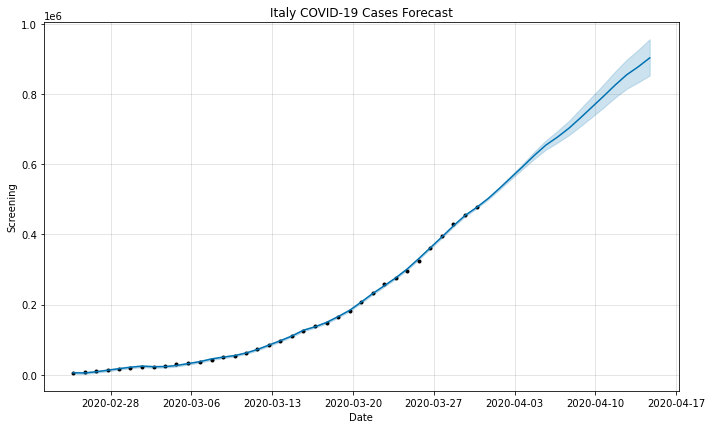

In [29]:
import plotly.offline as py
fig_test = plot_plotly(m, forecast_test, xlabel='Date', ylabel='Cases')
py.iplot(fig_test) 
fig_test = m.plot(forecast_test,xlabel='Date',ylabel='Screening')
plt.title('Italy COVID-19 Cases Forecast')